In [58]:
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error,explained_variance_score
from keras.layers.core import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.layers.core import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from keras.layers.core import Activation
from sklearn import preprocessing
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
import seaborn as sns


In [59]:
df = pd.read_csv('diamonds.csv')
df = df.drop('id',axis=1)

df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [60]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [61]:

df = pd.get_dummies(df, columns=['cut'])
df = pd.get_dummies(df, columns=['clarity'])
df = pd.get_dummies(df, columns=['color'])

df.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,clarity_VS2,clarity_VVS1,clarity_VVS2,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
df.dtypes

carat            float64
depth            float64
table            float64
price              int64
x                float64
y                float64
z                float64
cut_Fair           uint8
cut_Good           uint8
cut_Ideal          uint8
cut_Premium        uint8
cut_Very Good      uint8
clarity_I1         uint8
clarity_IF         uint8
clarity_SI1        uint8
clarity_SI2        uint8
clarity_VS1        uint8
clarity_VS2        uint8
clarity_VVS1       uint8
clarity_VVS2       uint8
color_D            uint8
color_E            uint8
color_F            uint8
color_G            uint8
color_H            uint8
color_I            uint8
color_J            uint8
dtype: object

In [63]:
#inputs 
X = df.drop('price',axis=1).values 
#output
y = df['price'].values.reshape(-1,1)

In [64]:
X.shape

(53940, 26)

In [65]:
y.shape

(53940, 1)

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101) 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
X_train.shape

(43152, 26)

In [69]:
X_test

array([[0.06444906, 0.54722222, 0.30555556, ..., 0.        , 0.        ,
        0.        ],
       [0.17879418, 0.525     , 0.44444444, ..., 0.        , 1.        ,
        0.        ],
       [0.02702703, 0.50833333, 0.36111111, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.04158004, 0.54444444, 0.38888889, ..., 0.        , 0.        ,
        0.        ],
       [0.02079002, 0.52222222, 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.06860707, 0.53333333, 0.30555556, ..., 1.        , 0.        ,
        0.        ]])

In [70]:
y_test.shape

(10788, 1)

In [71]:
import tensorflow.keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [72]:
model = Sequential()
model.add(Dense(10, input_shape=(26,26), activation='relu')) 
model.add(Dense(20, activation='relu')) 
model.add(Dense(1))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 26, 10)            270       
_________________________________________________________________
dense_10 (Dense)             (None, 26, 20)            220       
_________________________________________________________________
dense_11 (Dense)             (None, 26, 1)             21        
Total params: 511
Trainable params: 511
Non-trainable params: 0
_________________________________________________________________


In [73]:


metrics = ['accuracy']
optimizer = keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')
model.optimizer.get_config()


{'name': 'Adam',
 'learning_rate': 0.01,
 'decay': 0.0,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-07,
 'amsgrad': False}

Epoch 1/50
216/216 [==============================] - 1s 3ms/step - loss: 30904986.1567 - val_loss: 31246666.0000
Epoch 2/50
216/216 [==============================] - 0s 2ms/step - loss: 30461105.3272 - val_loss: 28098414.0000
Epoch 3/50
216/216 [==============================] - 1s 3ms/step - loss: 26312215.3088 - val_loss: 21805252.0000
Epoch 4/50
216/216 [==============================] - 0s 2ms/step - loss: 20115642.8387 - val_loss: 16339305.0000
Epoch 5/50
216/216 [==============================] - 0s 2ms/step - loss: 15145767.2258 - val_loss: 14353834.0000
Epoch 6/50
216/216 [==============================] - 0s 2ms/step - loss: 14001932.3594 - val_loss: 13915070.0000
Epoch 7/50
216/216 [==============================] - 0s 2ms/step - loss: 13867241.7558 - val_loss: 13650645.0000
Epoch 8/50
216/216 [==============================] - 0s 2ms/step - loss: 13610134.6498 - val_loss: 13403770.0000
Epoch 9/50
216/216 [==============================] - 0s 2ms/step - loss: 13201094.0968 

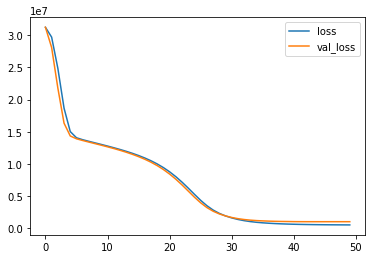

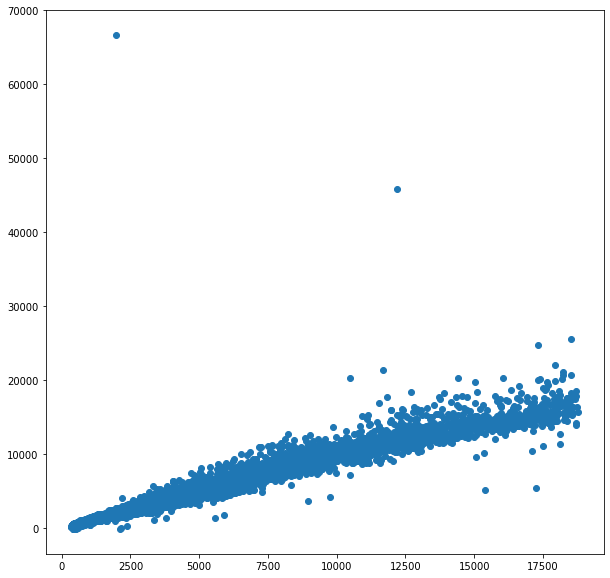

In [74]:

model.compile(optimizer='adam',loss='mse')
model.fit(X_train,y_train, 
          validation_data=(X_test,y_test),
          batch_size=258,epochs=50)

loss_df = pd.DataFrame(model.history.history)
loss_df.plot()
preds = model.predict(X_test)


explained_variance_score(y_test,preds)
plt.figure(figsize=(10,10))
plt.scatter(y_test,preds)


Epoch 1/100
574/574 [==============================] - 1s 2ms/step - loss: 537992.6875 - val_loss: 485771.1875
Epoch 2/100
574/574 [==============================] - 1s 2ms/step - loss: 530736.4375 - val_loss: 479058.8438
Epoch 3/100
574/574 [==============================] - 1s 2ms/step - loss: 525361.4375 - val_loss: 473105.0938
Epoch 4/100
574/574 [==============================] - 1s 2ms/step - loss: 520295.5312 - val_loss: 472100.8750
Epoch 5/100
574/574 [==============================] - 1s 2ms/step - loss: 516746.0312 - val_loss: 464204.0938
Epoch 6/100
574/574 [==============================] - 1s 2ms/step - loss: 512726.5312 - val_loss: 461178.4062
Epoch 7/100
574/574 [==============================] - 1s 2ms/step - loss: 510455.1250 - val_loss: 458559.1562
Epoch 8/100
574/574 [==============================] - 1s 2ms/step - loss: 507696.2812 - val_loss: 459251.0938
Epoch 9/100
574/574 [==============================] - 1s 2ms/step - loss: 504868.4375 - val_loss: 454432.8750
E

574/574 [==============================] - 1s 2ms/step - loss: 419271.8125 - val_loss: 384162.0312
Epoch 75/100
574/574 [==============================] - 1s 2ms/step - loss: 419129.5000 - val_loss: 378899.9062
Epoch 76/100
574/574 [==============================] - 1s 2ms/step - loss: 418670.8125 - val_loss: 379179.5000
Epoch 77/100
574/574 [==============================] - 1s 2ms/step - loss: 418077.1562 - val_loss: 380053.0625
Epoch 78/100
574/574 [==============================] - 1s 2ms/step - loss: 418250.5625 - val_loss: 378457.0312
Epoch 79/100
574/574 [==============================] - 1s 3ms/step - loss: 417527.7812 - val_loss: 377456.7812
Epoch 80/100
574/574 [==============================] - 1s 2ms/step - loss: 416785.8750 - val_loss: 378988.3750
Epoch 81/100
574/574 [==============================] - 2s 3ms/step - loss: 416457.8750 - val_loss: 376709.1875
Epoch 82/100
574/574 [==============================] - 1s 2ms/step - loss: 416610.0312 - val_loss: 379587.2188
Epoch

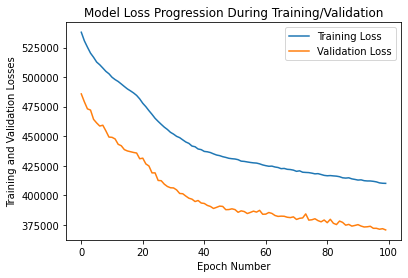

In [75]:
import matplotlib.pyplot as plt
epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=128,  verbose=1, validation_split=0.15)
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [76]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)

Text(0.5, 1.0, 'Korelasyon Matrisi')

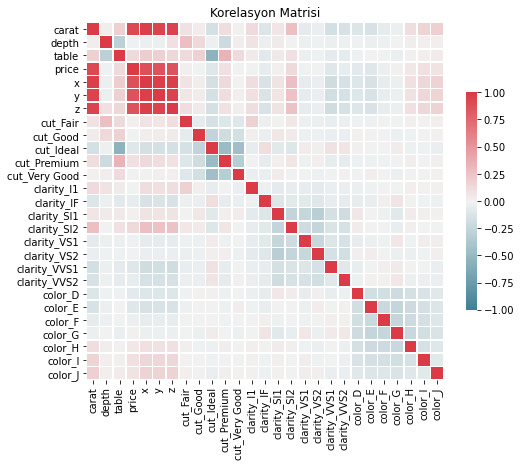

In [84]:
import seaborn as sns


f, ax = plt.subplots(figsize=(8, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap, vmax=1.0, vmin=-1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Korelasyon Matrisi')   
    


In [82]:


print("Ögrenme oranı "+ str(explained_variance_score(y_test,preds)))


print("Data frame shape: "+ str(df.shape))

print(df.describe())

Ögrenme oranı 0.9349267819804492
Data frame shape: (53940, 27)
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z      cut_Fair      cut_Good     cut_Ideal  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       5.734526      3.538734      0.029848      0.090953      